In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [26]:
card = pd.read_csv("card_clear_beforeEncoded.csv")
card = card.drop("Unnamed: 0",axis=1)

In [27]:
card

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.944960,22.166667,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,CUS_0xd40,March,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,34.663572,31.500000,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,40.565631,31.583333,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,41.255522,31.666667,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,33.638208,31.750000,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


### Split data

In [28]:
X = card.drop("Credit_Score",axis=1)
y = card["Credit_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### 類別型的先encoding

In [15]:
target_column = 'Credit_Score'
X = card.drop(columns=[target_column])
y = card[target_column]

categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
y_train

34555    Standard
4442     Standard
50811    Standard
45326    Standard
57679        Good
           ...   
31019    Standard
44566        Good
95816    Standard
72173    Standard
89256        Poor
Name: Credit_Score, Length: 80000, dtype: object

### logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
X_train_after_selection = X_train
X_test_after_selection = X_test

In [33]:
X_test_after_selection

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
75721,2359,2,30,8,43391.96,3688.996667,1,5,10,0,...,0,1,1468.28,29.112468,23.666667,0,0.000000,53.969385,0,554.930282
80184,7940,3,18,12,14351.21,1274.934167,8,7,18,6,...,9,0,4766.87,39.849732,8.083333,1,61.098718,118.080214,5,238.314485
19864,1078,3,41,2,130125.04,10871.753330,5,2,11,2,...,3,1,1195.05,21.542892,15.916667,0,204.285650,1255.899302,5,712.282431
76699,2211,0,35,8,20107.21,1631.600833,6,6,32,2,...,11,2,2544.60,32.423759,19.333333,1,27.106395,66.819775,5,359.233914
92991,10550,1,27,3,92186.19,7487.182500,1,2,12,4,...,4,1,809.01,39.543131,20.750000,0,185.797654,115.520039,1,697.400557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,6825,0,28,10,50940.09,4106.007500,8,7,8,5,...,6,2,2414.34,34.099913,12.416667,1,210.550380,266.037560,3,204.012810
29313,2765,2,32,3,30819.56,2547.296667,7,3,9,4,...,5,2,401.26,38.868023,14.166667,1,96.848591,70.862181,1,337.018894
37862,4901,4,40,1,24004.50,1935.375000,4,3,14,5,...,10,2,1215.00,34.074416,18.250000,1,56.365016,116.424024,5,355.889618
53421,12235,5,37,4,35185.56,2962.130000,6,4,14,3,...,0,2,379.47,28.452911,21.000000,0,83.278064,343.929192,5,159.005743


In [45]:
# 訓練多類別邏輯回歸模型
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
reg = model.fit(X_train_after_selection, y_train)
# 進行預測
y_pred = reg.predict(X_test_after_selection)

encoder = LabelEncoder()

y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)

# 評估模型
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f'Accuracy: {accuracy:.4f}')

# 顯示混淆矩陣
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
print("Confusion Matrix:")
print(conf_matrix)

# 顯示分類報告（Precision, Recall, F1-score）
class_report = classification_report(y_test_encoded, y_pred_encoded)
print("Classification Report:")
print(class_report)


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5310
Confusion Matrix:
[[    0     0  3556]
 [    0     0  5824]
 [    0     0 10620]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3556
           1       0.00      0.00      0.00      5824
           2       0.53      1.00      0.69     10620

    accuracy                           0.53     20000
   macro avg       0.18      0.33      0.23     20000
weighted avg       0.28      0.53      0.37     20000



C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Prec

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# 編碼 y_test 和 y_pred
y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)

print(y_test_encoded)
print(y_pred_encoded)

[2 1 0 ... 1 2 2]
[2 2 2 ... 2 2 2]


### Dnn

In [19]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical target variable to numeric
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train

array([2, 0, 0, ..., 2, 2, 1], dtype=int64)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical target variable to numeric
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
y_test

array([0, 1, 0, ..., 1, 2, 2], dtype=int64)

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from tensorflow.keras.utils import to_categorical


X_train_scaled = X_train_after_selection
X_test_scaled = X_test_after_selection

# 將目標變數 y 轉換為 one-hot 編碼
# y_train_encoded = y_train
# y_test_encoded = y_test
y_train_encoded = to_categorical(y_train, num_classes=3)  # Ensure 3 classes
y_test_encoded = to_categorical(y_test, num_classes=3) 
# 構建多類別 DNN 模型
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 輸出層，3 個類別

# 編譯模型
# from tensorflow.keras.optimizers import SGD

# optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# 預測
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Epoch 1/10


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4453 - loss: 108.7691 - val_accuracy: 0.5487 - val_loss: 10.1702
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4822 - loss: 10.0149 - val_accuracy: 0.5323 - val_loss: 1.5716
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5224 - loss: 1.4862 - val_accuracy: 0.5365 - val_loss: 0.9971
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5424 - loss: 0.9725 - val_accuracy: 0.5392 - val_loss: 0.9504
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5488 - loss: 0.9440 - val_accuracy: 0.5676 - val_loss: 0.9136
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5471 - loss: 0.9683 - val_accuracy: 0.5320 - val_loss: 1.0003
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5315 - loss: 1.0027 - val_accuracy: 0.5320 - val_loss: 1.0004
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5340 - loss: 1.0013 - val_acc

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [24]:
y_test

array([0, 1, 0, ..., 1, 2, 2], dtype=int64)

In [25]:
y_pred

array([[0.18101302, 0.2890344 , 0.5299525 ],
       [0.18101302, 0.2890344 , 0.5299525 ],
       [0.18101302, 0.2890344 , 0.5299525 ],
       ...,
       [0.18101302, 0.2890344 , 0.5299525 ],
       [0.18101302, 0.2890344 , 0.5299525 ],
       [0.18101302, 0.2890344 , 0.5299525 ]], dtype=float32)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy(Before feature selection): {accuracy * 100} %")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix(Before feature selection)")
plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

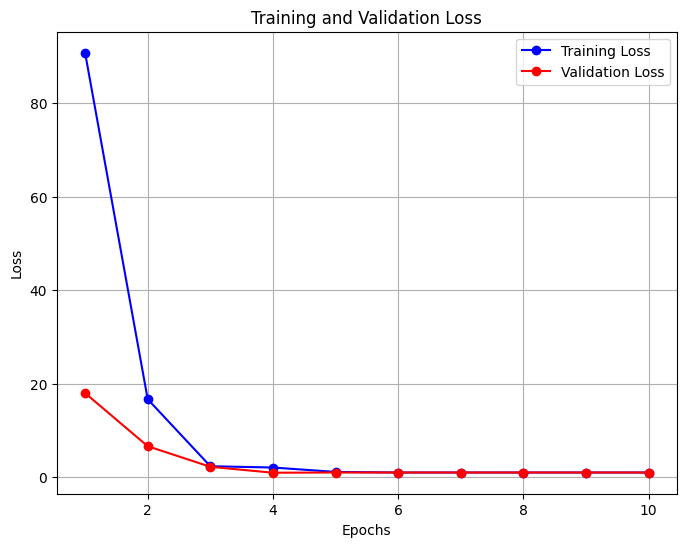

In [ ]:
import matplotlib.pyplot as plt

# 假設 `history` 是訓練後得到的結果
history_dict = history.history

# 獲取 loss 和 val_loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# 設定 x 軸為 epochs
epochs = range(1, len(loss) + 1)

# 畫圖
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' 表示藍色圓點
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 'ro-' 表示紅色圓點
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',   # 監控驗證損失
    patience=10,           # 容忍驗證損失不改善的 epoch 數
    restore_best_weights=True  # 恢復至驗證集表現最好的權重
)

history = model.fit(
    X_train_scaled, y_train_encoded,
    validation_split=0.2,
    epochs=100,
    batch_size = 32,
    callbacks=[early_stopping]
)


Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5318 - loss: 1.0029 - val_accuracy: 0.5320 - val_loss: 1.0003
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5326 - loss: 1.0020 - val_accuracy: 0.5320 - val_loss: 1.0006
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5326 - loss: 1.0030 - val_accuracy: 0.5320 - val_loss: 1.0003
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5329 - loss: 1.0032 - val_accuracy: 0.5320 - val_loss: 1.0006
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5364 - loss: 0.9994 - val_accuracy: 0.5320 - val_loss: 1.0003
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5316 - loss: 1.0039 - val_accuracy: 0.5320 - val_loss: 1.0003
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5356 - loss: 1.0006 - val_accuracy: 0.5320 - val_loss: 1.0002
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5319 - loss: 1

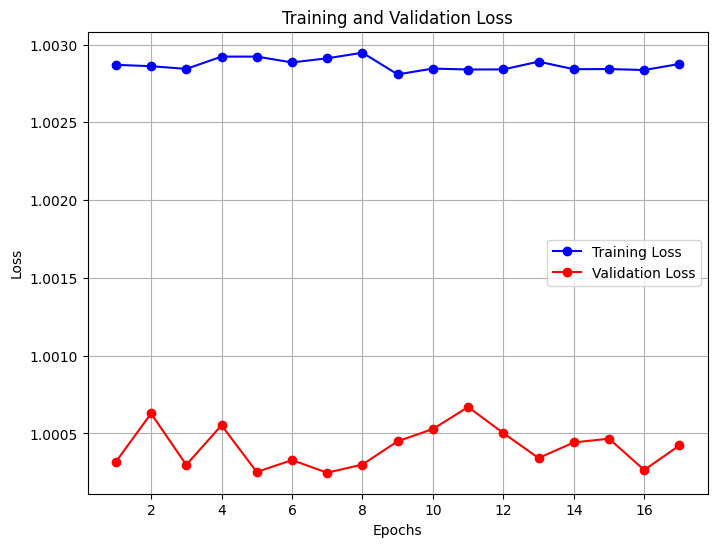

In [ ]:
import matplotlib.pyplot as plt

# 假設 `history` 是訓練後得到的結果
history_dict = history.history

# 獲取 loss 和 val_loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# 設定 x 軸為 epochs
epochs = range(1, len(loss) + 1)

# 畫圖
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' 表示藍色圓點
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 'ro-' 表示紅色圓點
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


X_train_scaled = X_train_after_selection
X_test_scaled = X_test_after_selection

# 將目標變數 y 轉換為 one-hot 編碼
# y_train_encoded = y_train
# y_test_encoded = y_test
y_train_encoded = y_train  # Ensure 3 classes
y_test_encoded = y_test
# 加載數據
# df = pd.read_csv("data.csv")
# X = df.drop('target', axis=1)
# y = df['target']

# 分割數據
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 訓練模型
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',
    num_class=len(np.unique(y_train_encoded))
)
xgb_model.fit(X_train_scaled, y_train_encoded)

# 預測與評估
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test_encoded, y_pred))


Confusion Matrix:
[[    0     0  3527]
 [    0     0  5874]
 [    0     0 10599]]
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.61      0.71      0.66      3527
           1       0.75      0.69      0.72      5874
           2       0.77      0.77      0.77     10599

    accuracy                           0.74     20000
   macro avg       0.71      0.72      0.72     20000
weighted avg       0.74      0.74      0.74     20000

